In [1]:
%matplotlib inline

In [2]:
import os
import netCDF4
import numpy as np
from geophys_utils import NetCDFLineUtils
import matplotlib.pyplot as plt

In [3]:
# Setup proxy as required
GA_STAFF_WIFI = False

if GA_STAFF_WIFI:
    os.environ['http_proxy'] = 'http://proxy.inno.lan:3128'
    os.environ['https_proxy'] = 'http://proxy.inno.lan:3128'

In [4]:
nc_path = '/g/data2/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/mag_database_reformat_2016_adjusted/netcdf/GSSA_P1255MAG_Marree.nc'
if not os.path.isfile(nc_path):
    nc_path = 'http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/mag_database_reformat_2016_adjusted/netcdf/GSSA_P1255MAG_Marree.nc'
bounds = (137, -29, 138, -28) # Spatial subset of dataset

In [5]:
# Initialise NetCDFLineUtils object
# Code is at https://github.com/alex-ip/geophys_utils
nc_dataset = netCDF4.Dataset(nc_path)
netcdf_line_utils = NetCDFLineUtils(nc_dataset)
netcdf_line_utils.__dict__

{'_debug': False, '_nc_cache_dataset': <class 'netCDF4._netCDF4.Dataset'>
 root group (NETCDF4 data model, file format HDF5):
     dimensions(sizes): point(19047545), xy(2), line(819), start_end(2)
     variables(dimensions): float64 xycoords(point,xy), int32 line(line), int32 line_start_end(line,start_end)
     groups: , 'bounds': [136.481224,
  -29.765191,
  139.527599,
  -27.988115], 'data_variable_list': [], 'grid_mapping_variable': <class 'netCDF4._netCDF4.Variable'>
 int32 crs()
     grid_mapping_name: latitude_longitude
     epsg_code: EPSG:4283
     semi_major_axis: 6378137.0
     inverse_flattening: 298.257222101
 unlimited dimensions: 
 current shape = ()
 filling off, 'kdtree': None, 'line': <class 'netCDF4._netCDF4.Variable'>
 int32 line(line)
     _FillValue: -1
 unlimited dimensions: 
 current shape = (819,)
 filling on, 'line_count': 819, 'line_start_end': <class 'netCDF4._netCDF4.Variable'>
 int32 line_start_end(line, start_end)
     _FillValue: -1
 unlimited dimensions

In [6]:
# Test get_spatial_mask function and count the points within the bounding box
spatial_mask = netcdf_line_utils.get_spatial_mask(bounds)
np.count_nonzero(spatial_mask)

4613089

In [7]:
# Count the points in a couple of lines
for line_number, line_mask in netcdf_line_utils.get_line_masks(line_numbers=[100060, 100070]):
    print('Line {} has {} points'.format(line_number, np.count_nonzero(line_mask)))

Line 100060 has 25373 points
Line 100070 has 27756 points


In [8]:
# Get all coordinates and data points for line 100060
line_number, line_dict = next(netcdf_line_utils.get_lines(line_numbers=100060))
#print(line_number, line_dict)

In [9]:
# Convert coordinates to UTM and compute cumulative distances in metres for line 100060
utm_distances = netcdf_line_utils.coords2metres(line_dict['coordinates'])
print(utm_distances)

[0.00000000e+00 5.98434645e+00 1.19686929e+01 ... 1.61925609e+05
 1.61932260e+05 1.61938799e+05]


height
mag_awags
mag_mlev
mag_lev


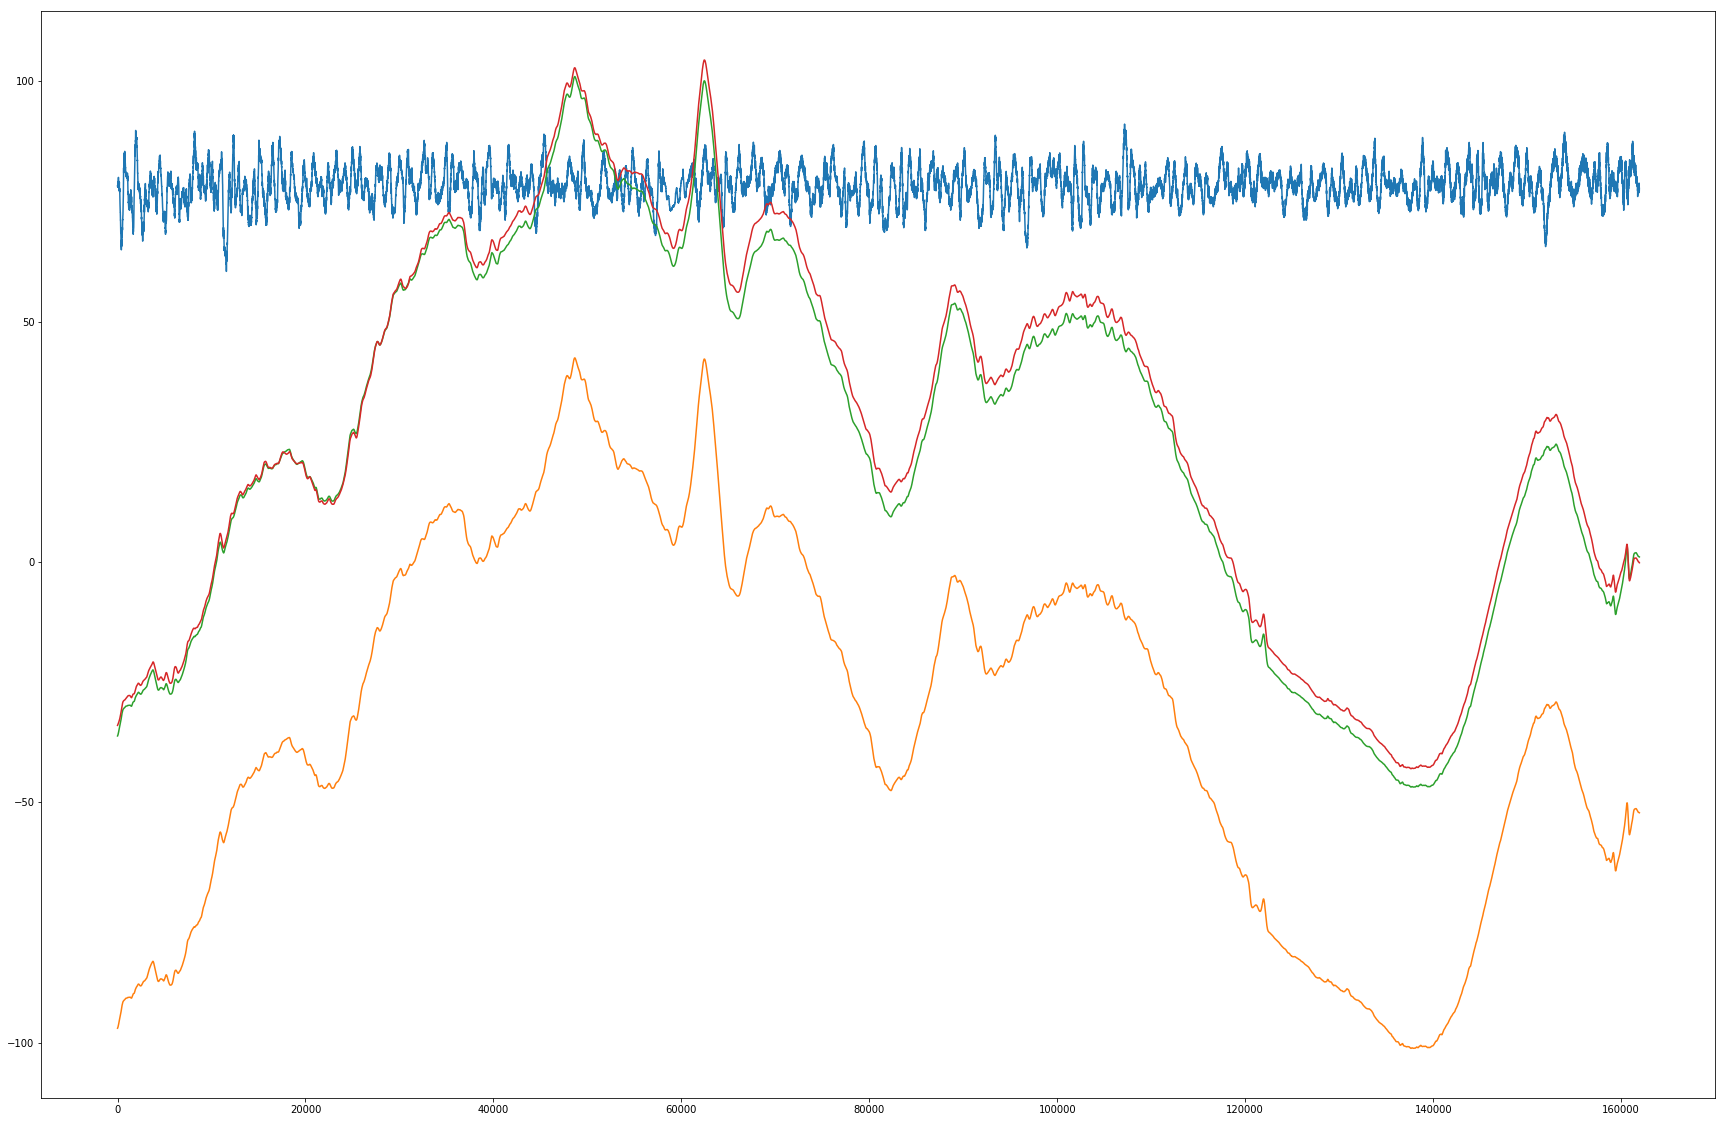

In [ ]:
# Plot data points against line distance for line 100060
plt.figure(figsize=(30,20))   
for varname in line_dict.keys():
    if varname != 'coordinates':
        print(varname)
        plt.plot(utm_distances, line_dict[varname])

In [ ]:
# Grid points to 100m resolution in UTM
utm_mag_awags_grid, crs, geotransform = netcdf_line_utils.utm_grid_points(utm_grid_resolution=100.0, 
                                               variables='mag_awags', 
                                               native_grid_bounds=bounds,
                                               point_step=1)
print(crs)
print(geotransform)
print(utm_mag_awags_grid.shape)

In [ ]:
plt.figure(figsize=(30,20))    
plt.imshow(utm_mag_awags_grid)